In [1]:
def quick_sort(arr):
    """
    Basic Quick Sort implementation using recursion
    """
    if len(arr) <= 1:
        return arr
    
    pivot = arr[-1]
    
    left = [x for x in arr[:-1] if x <= pivot] 
    right = [x for x in arr[:-1] if x > pivot]
    
    return quick_sort(left) + [pivot] + quick_sort(right)

test_array = [64, 34, 25, 12, 22, 11, 90]
print("Original array:", test_array)
print("Sorted array:", quick_sort(test_array))

Original array: [64, 34, 25, 12, 22, 11, 90]
Sorted array: [11, 12, 22, 25, 34, 64, 90]


In [2]:
def quick_sort_inplace(arr, low, high):
    """
    In-place Quick Sort implementation (more memory efficient)
    """
    if low < high:
        pivot_index = partition(arr, low, high)
        
        quick_sort_inplace(arr, low, pivot_index - 1)
        quick_sort_inplace(arr, pivot_index + 1, high)

def partition(arr, low, high):
    """
    Partition function using last element as pivot
    """
    pivot = arr[high]
    i = low - 1
    
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]  
    
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

test_array = [64, 34, 25, 12, 22, 11, 90]
print("Original array:", test_array)
quick_sort_inplace(test_array, 0, len(test_array) - 1)
print("Sorted array:", test_array)

Original array: [64, 34, 25, 12, 22, 11, 90]
Sorted array: [11, 12, 22, 25, 34, 64, 90]


In [3]:
import time
import random
import matplotlib.pyplot as plt

def quick_sort_with_steps(arr, steps=None):
    """
    Quick Sort that records each step for visualization
    """
    if steps is None:
        steps = []
    
    if len(arr) <= 1:
        return arr
    
    pivot = arr[-1]
    left = [x for x in arr[:-1] if x <= pivot]
    right = [x for x in arr[:-1] if x > pivot]
    
    result = quick_sort_with_steps(left, steps) + [pivot] + quick_sort_with_steps(right, steps)
    steps.append(result.copy())
    return result

test_array = [38, 27, 43, 3, 9, 82, 10]
steps = []
sorted_arr = quick_sort_with_steps(test_array.copy(), steps)

print("Sorting Steps:")
print(f"Step 0 (Original): {test_array}")
for i, step in enumerate(steps, 1):
    print(f"Step {i}: {step}")

Sorting Steps:
Step 0 (Original): [38, 27, 43, 3, 9, 82, 10]
Step 1: [3, 9]
Step 2: [27, 38]
Step 3: [27, 38, 43]
Step 4: [27, 38, 43, 82]
Step 5: [3, 9, 10, 27, 38, 43, 82]


Performance Analysis:
----------------------------------------
Array size:    100 | Time: 0.001487 seconds
Array size:    500 | Time: 0.000000 seconds
Array size:   1000 | Time: 0.001378 seconds
Array size:   5000 | Time: 0.007469 seconds
Array size:  10000 | Time: 0.014242 seconds


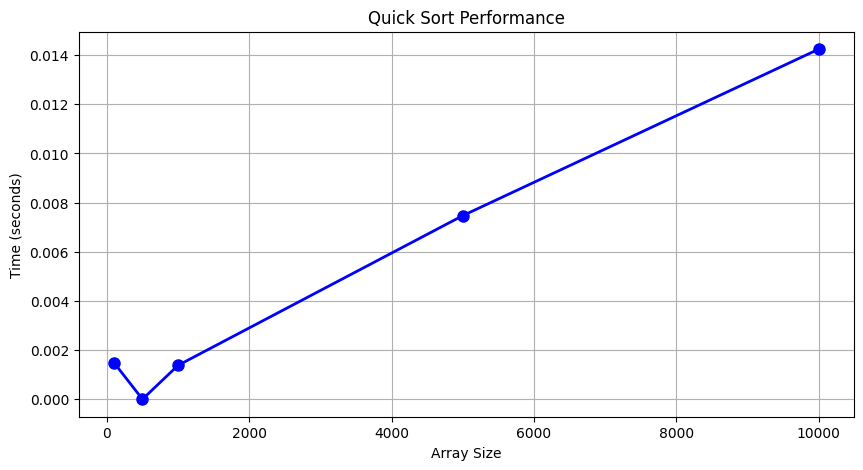

In [4]:
import time
import random

def measure_time(sort_func, arr, *args):
    """Measure execution time of sorting function"""
    start = time.time()
    if args:
        sort_func(arr, *args)
    else:
        sort_func(arr)
    return time.time() - start

sizes = [100, 500, 1000, 5000, 10000]
times = []

print("Performance Analysis:")
print("-" * 40)

for size in sizes:
    arr = [random.randint(1, 10000) for _ in range(size)]
    
    arr_copy = arr.copy()
    elapsed = measure_time(quick_sort_inplace, arr_copy, 0, len(arr_copy) - 1)
    times.append(elapsed)
    print(f"Array size: {size:>6} | Time: {elapsed:.6f} seconds")

plt.figure(figsize=(10, 5))
plt.plot(sizes, times, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.title('Quick Sort Performance')
plt.grid(True)
plt.show()

In [ ]:
import random

def quick_sort_random_pivot(arr):
    """Quick Sort with random pivot selection"""
    if len(arr) <= 1:
        return arr
    
    pivot_idx = random.randint(0, len(arr) - 1)
    pivot = arr[pivot_idx]
    
    left = [x for i, x in enumerate(arr) if x < pivot or (x == pivot and i < pivot_idx)]
    right = [x for i, x in enumerate(arr) if x > pivot or (x == pivot and i > pivot_idx)]
    
    return quick_sort_random_pivot(left) + [pivot] + quick_sort_random_pivot(right)


def quick_sort_median_pivot(arr):
    """Quick Sort with median-of-three pivot selection"""
    if len(arr) <= 1:
        return arr
    
    first, middle, last = arr[0], arr[len(arr)//2], arr[-1]
    pivot = sorted([first, middle, last])[1]
    
    left = [x for x in arr if x < pivot]
    middle_arr = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    return quick_sort_median_pivot(left) + middle_arr + quick_sort_median_pivot(right)


# Test different pivot strategies
test_array = [64, 34, 25, 12, 22, 11, 90, 45, 33]

print("Original array:", test_array)
print("Random pivot:", quick_sort_random_pivot(test_array.copy()))
print("Median pivot:", quick_sort_median_pivot(test_array.copy()))